# Examples of machine learning models

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

In [36]:
random_state = 1234

## Classification
Let's go back to the stroke data.

In [37]:
# load the data and take a peek
df = pd.read_csv("../01_stroke/stroke_data.csv")
# Keep the numeric imaging predictors
VC_preds = ["CALCVol", "CALCVolProp", "MATXVol", "MATXVolProp", "LRNCVol", 
    "LRNCVolProp", "MaxCALCArea", "MaxCALCAreaProp", "MaxDilationByArea", 
    "MaxMATXArea", "MaxMATXAreaProp", "MaxLRNCArea", "MaxLRNCAreaProp", 
    "MaxMaxWallThickness", "MaxRemodelingRatio", "MaxStenosisByArea", 
    "MaxWallArea", "WallVol", "MaxStenosisByDiameter"]
X_train, X_test, y_train, y = train_test_split(df[VC_preds], df["Stroke"] == "Y", random_state=random_state)
print("Training positive percentage:",sum(y_train) / len(y_train))
print("Testing positive percentage:",sum(y)/ len(y))

Training positive percentage: 0.5212765957446809
Testing positive percentage: 0.46875


In [38]:
tree = DecisionTreeClassifier(random_state=random_state)
tree.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",1234
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [39]:
# What's the accuracy?
tree.score(X_train, y_train)

1.0

In [40]:
export_graphviz(tree, out_file="default_tree.dot", class_names=["Stroke", "No Stroke"],
                feature_names=VC_preds, impurity=False, filled=True)


In [41]:
# Try again, restrict the tree depth
tree = DecisionTreeClassifier(random_state=random_state, max_depth=3)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
export_graphviz(tree, out_file="smaller_tree.dot", class_names=["Stroke", "No Stroke"],
                feature_names=VC_preds, impurity=False, filled=True)

0.8085106382978723


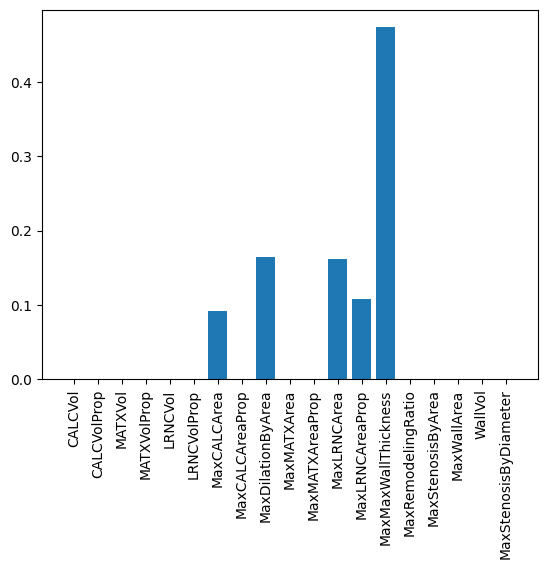

In [42]:
fi = tree.feature_importances_
ticks = np.arange(len(VC_preds))
plt.bar(ticks, fi)
plt.xticks(ticks=ticks, labels=VC_preds, rotation = 90)
plt.show()


## Regression

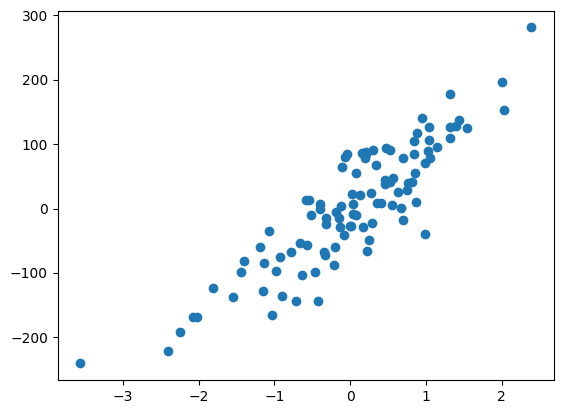

In [43]:
X, y = make_regression(n_features=1, n_targets=1, n_samples=100, noise=50, random_state=random_state)
plt.scatter(X, y)

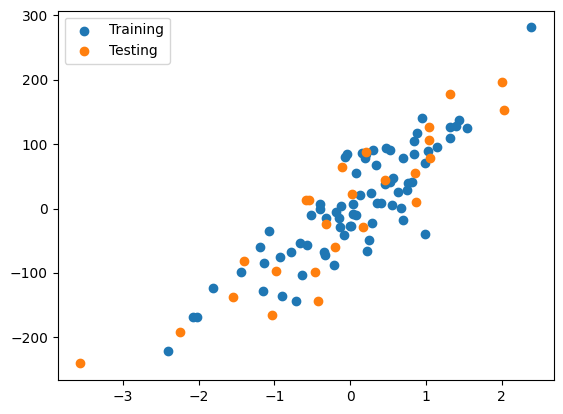

In [44]:
X_train, X_test, y_train, y = train_test_split(X, y, random_state=random_state)
# scatter both
plt.scatter(X_train, y_train, label="Training")
plt.scatter(X_test, y, label="Testing")
plt.legend()

[85.92792688] 0.2714991710365311


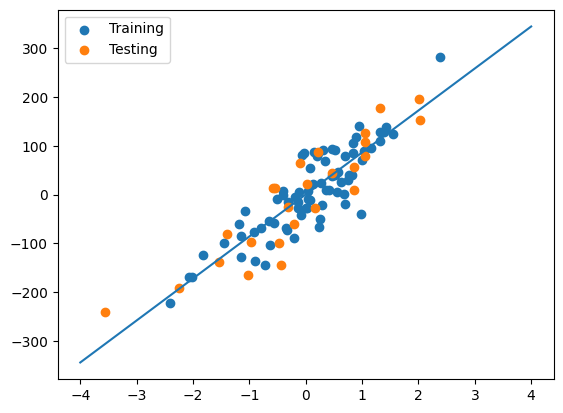

In [45]:
lr = LinearRegression().fit(X_train, y_train)
print(lr.coef_, lr.intercept_)
# add a line
x_line = np.array([-4, 4])
y_line = x_line * lr.coef_ + lr.intercept_

plt.scatter(X_train, y_train, label="Training")
plt.scatter(X_test, y, label="Testing")
plt.legend()
plt.plot(x_line, y_line)

In [46]:
# Evaluation metrics
def regression_metrics(model, X, y):
    y_pred = model.predict(X)
    mse = ((y_pred - y) ** 2).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(y_pred - y).mean()
    mape = 100*np.abs((y_pred - y) / y).mean()

    print(f"MSE: {mse:.1f}")
    print(f"RMSE: {rmse:.1f}")
    print(f"MAE: {mae:.1f}")
    print(f"MAPE: {mape:.1f}")
    print(f"R^2: {model.score(X, y):.2f}")

regression_metrics(lr, X_train, y_train)

MSE: 1843.8
RMSE: 42.9
MAE: 33.4
MAPE: 189.6
R^2: 0.76


In [47]:
tree_reg = DecisionTreeRegressor().fit(X_train, y_train)
regression_metrics(tree_reg, X_train, y_train)

MSE: 0.0
RMSE: 0.0
MAE: 0.0
MAPE: 0.0
R^2: 1.00


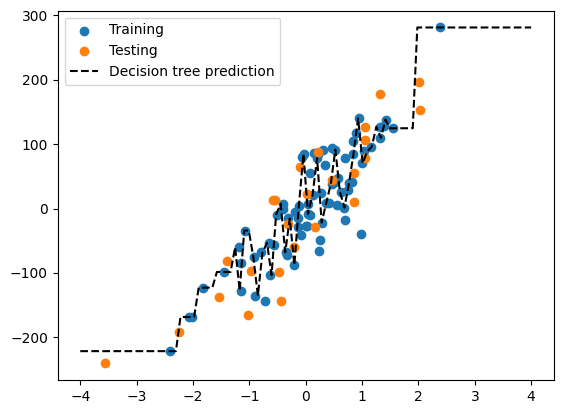

In [48]:
plt.scatter(X_train, y_train, label="Training")
plt.scatter(X_test, y, label="Testing")
x_samples = np.linspace(-4,4,100).reshape(100, 1)
plt.plot(x_samples, tree_reg.predict(x_samples), color='k', linestyle='--', label="Decision tree prediction")
plt.legend()